In [4]:
toy = '/Users/rahulbrito/Documents/projects/infantvoice/data/Full_Readings/0300222_recordings_16khz/002.wav'

In [ ]:
from pyannote.audio.pipelines import VoiceActivityDetection
pipeline = VoiceActivityDetection(segmentation="pyannote/segmentation")
HYPER_PARAMETERS = {
  # onset/offset activation thresholds
  "onset": 0.5, "offset": 0.5,
  # remove speech regions shorter than that many seconds.
  "min_duration_on": 0.0,
  # fill non-speech regions shorter than that many seconds.
  "min_duration_off": 0.0
}
pipeline.instantiate(HYPER_PARAMETERS)
vad = pipeline(toy)
# `vad` is a pyannote.core.Annotation instance containing speech regions

In [ ]:
from pyannote.audio.pipelines import OverlappedSpeechDetection
pipeline = OverlappedSpeechDetection(segmentation="pyannote/segmentation")
pipeline.instantiate(HYPER_PARAMETERS)
osd = pipeline(toy)
# `osd` is a pyannote.core.Annotation instance containing overlapped speech regions

In [ ]:
from pyannote.audio import Inference
inference = Inference("pyannote/segmentation")
segmentation = inference(toy)
# `segmentation` is a pyannote.core.SlidingWindowFeature
# instance containing raw segmentation scores like the 
# one pictured above (output)

In [5]:
from pyannote.audio import Pipeline
pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization")
output = pipeline(toy)

#for turn, _, speaker in output.itertracks(yield_label=True):
# speaker speaks between turn.start and turn.end

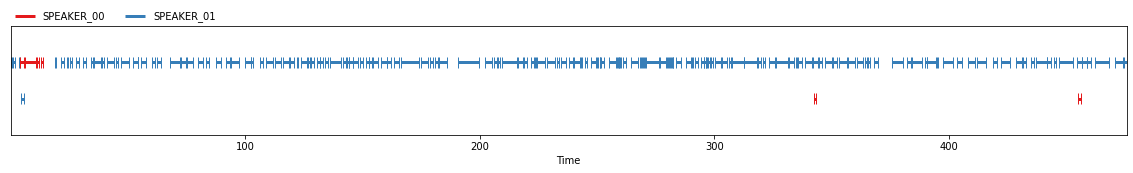

In [6]:
output

In [74]:
test1 = [output for segment, track, label in output.itertracks(yield_label=True) if label=='SPEAKER_01']
len(test1), len(output)

(165, 184)

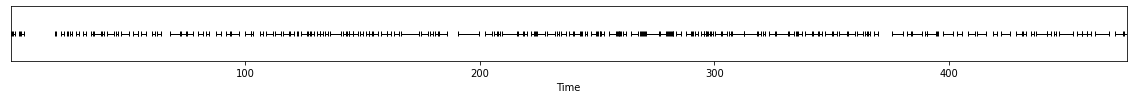

In [81]:
sub = output.label_timeline('SPEAKER_01')
sub

In [85]:
from pyannote.audio import Inference
inference = Inference("pyannote/embedding", window="whole")
embedding1 = inference(toy)

In [86]:
pd.DataFrameIembedding1

array([ 1.98652382e+01,  6.09728909e+00,  1.71480961e+01,  6.31041431e+00,
       -9.16975617e-01, -1.94022160e+01, -3.70599022e+01,  1.72384701e+01,
        1.18982105e+01,  6.92636251e+00,  5.81140804e+00, -3.39967957e+01,
       -1.57056646e+01,  7.66986179e+00,  3.57440987e+01,  1.95193462e+01,
        1.48947334e+01,  8.30985832e+00,  4.89178085e+00,  8.19711494e+00,
       -1.28250980e+01,  6.29426289e+00, -6.42460775e+00,  5.50431442e+00,
        6.61477041e+00,  4.25683174e+01,  7.14360285e+00,  3.81135216e+01,
        1.17316780e+01,  2.27864575e+00,  2.01429729e+01, -3.65708923e+01,
       -1.48431034e+01,  2.60720940e+01, -1.75140119e+00,  1.25934486e+01,
       -2.39351616e+01,  3.85435448e+01, -2.92460155e+01,  1.09747810e+01,
        1.63118515e+01, -1.13591957e+01,  7.59707928e+00,  2.07738280e-02,
       -3.09734011e+00, -2.06832695e+01,  2.24132004e+01,  4.42292404e+01,
       -2.35352230e+01, -1.21980896e+01,  1.61843643e+01,  3.58614326e+00,
        3.20562325e+01,  